## 1. Importing Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define the path to import data
path = r"C:\Users\enthu\Desktop\Bootcamps\Instacart Basket Analysis"

In [3]:
path

'C:\\Users\\enthu\\Desktop\\Bootcamps\\Instacart Basket Analysis'

In [4]:
# Import the new prepared data file
cstms_ords_prods = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [5]:
# Get the column names
cstms_ords_prods.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spenders', 'frequency_median', 'customers',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

## 2. Visualizations

Text(0.5, 0, 'Hour of the Day')

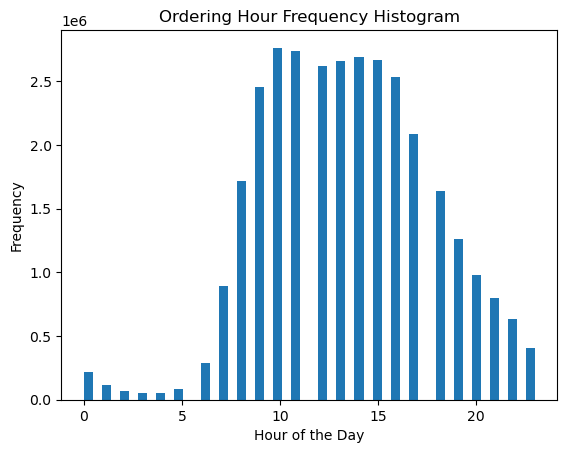

In [6]:
# Create a histogram of the order_hour_of_day column 
hist = cstms_ords_prods['order_hour_of_day'].plot.hist(bins = 50)
plt.title('Ordering Hour Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Hour of the Day')

Most orders occur 9 am - 4 pm. 10 am is the busiest hour in genral. 3 am is the slowest hour in general.

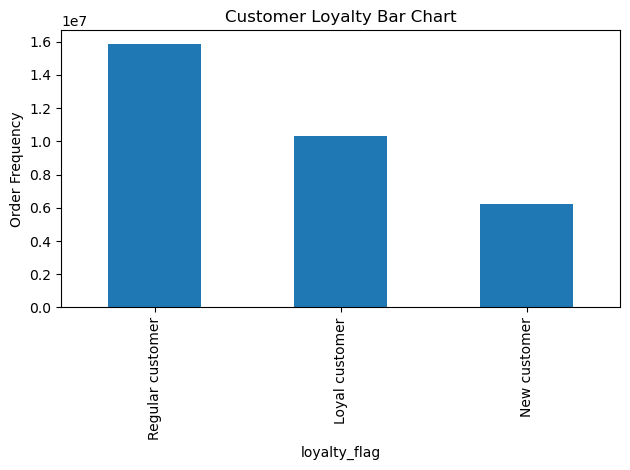

In [26]:
# Create a bar chart to identify different types of customers
bar = cstms_ords_prods['loyalty_flag'].value_counts().plot.bar()
plt.title('Customer Loyalty Bar Chart')
plt.ylabel('Order Frequency')
plt.tight_layout()

In [8]:
# Use the 70/30 split to sample the data
np.random.seed(4)
dev = np.random.rand(len(cstms_ords_prods)) <= 0.7

In [9]:
dev

array([False,  True, False, ..., False,  True,  True])

In [10]:
# Store 70 percent of the dataframe in a big sample
big = cstms_ords_prods[dev]

In [11]:
# Store 30 percent of the dataframe in a small sample
small = cstms_ords_prods[~dev]

In [12]:
# Double-check the length
len(cstms_ords_prods)

32434212

In [13]:
len(big) + len(small)

32434212

The numbers match.

In [14]:
# Create a new dataframe for the needed information for the line chart
df_line_chart = small[['order_hour_of_day','prices']]

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

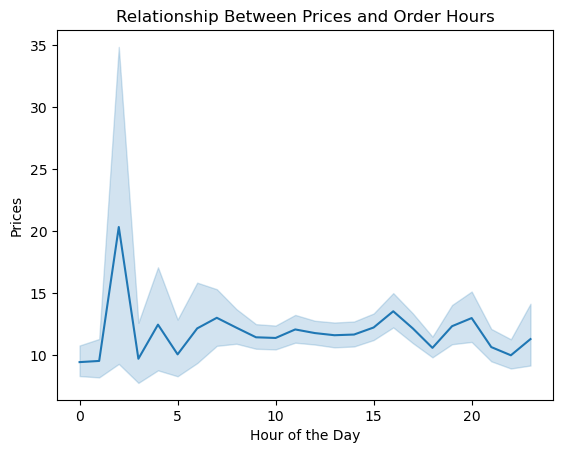

In [15]:
# Create a Line chart
line = sns.lineplot(data = df_line_chart, x = 'order_hour_of_day',y = 'prices')
plt.title('Relationship Between Prices and Order Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')

There's definitely a difference in expenditure depending on the hour of the day.

In [16]:
# Create a new dataframe for the needed information for the line chart
df_line_chart_2 = small[['age','n_dependants']]

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


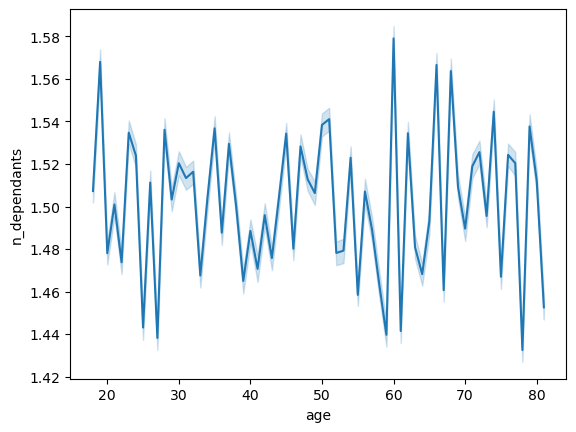

In [17]:
# Create a Line chart
line_2 = sns.lineplot(data = df_line_chart_2, x = 'age',y = 'n_dependants')

There is not a clear pattern that indicates that there is a direct relationship between age and the number of dependents.

In [18]:
# Check the consistency of age
cstms_ords_prods['age'].describe()

count    3.243421e+07
mean     4.946521e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [19]:
# Check the consistency of spending power
cstms_ords_prods['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

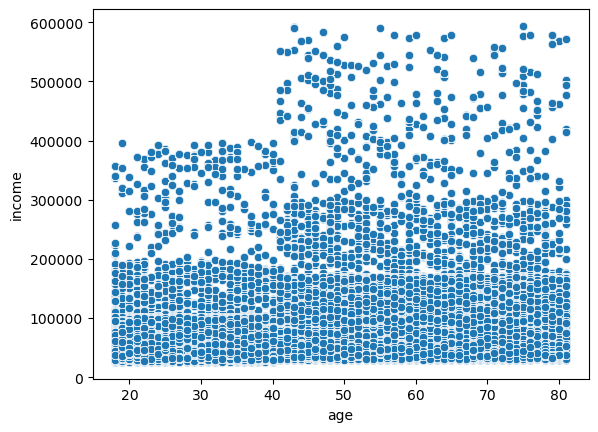

In [20]:
# Create a scatterplot 
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = cstms_ords_prods)

It shows that spending power is distributed somewhat evenly from age 18 to age 40. After age 40, it increases significantly.

## 3. Exporting Charts

In [27]:
# Export the histogram as a png file
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [28]:
# Export the bar chart as a png file
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [29]:
# Export the first line chart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_prices_order_hour_of_day.png'))

In [30]:
# Export the second line chart
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_n_dependants_age.png'))

In [31]:
# Export the scatterplot
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_income_age.png'))